**<h1>📌 Predicting Track Popularity through Regression Analysis</h1>**

✅ *In this section, we employed supervised learning through regression techniques to forecast track popularity by considering various criteria. We began by acquiring, cleaning, and preprocessing the data. Next, we carefully selected the most appropriate criteria to achieve our goal of predicting track popularity effectively.*

**Importing Libraries** 📚

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Connecting to the Database** 📂

In [2]:
my_database = mysql.connector.connect(
host = "127.0.0.1",
port = "3306",
user = "root",
password = "Your Password",
auth_plugin = "mysql_native_password",
database = "spotify"
)

cursor = my_database.cursor()

**Reading data** 📡

In [3]:
query = """
  SELECT
    track_info.title,
    genre.genres_name,
    artist.artist_name,
    track_info.popularity,
    track_music.key,
    track_music.duration_ms,
    track_music.loudness,
    track_music.tempo,
    track_music.danceability,
    track_music.energy,
    track_music.speechiness,
    track_music.acoustics,
    track_music.instrumentalness,
    track_music.liveliness,
    track_lyric.n_words,
    track_lyric.anger,
    track_lyric.anticipation,
    track_lyric.disgust,
    track_lyric.fear,
    track_lyric.joy,
    track_lyric.sadness,
    track_lyric.surprise,
    track_lyric.trust,
    track_lyric.negative,
    track_lyric.positive
  FROM track_info
  JOIN artist ON track_info.artist_id = artist.artist_id
  JOIN genre ON track_info.genre_id = genre.genre_id
  JOIN track_music ON track_info.track_id = track_music.track_id
  JOIN track_lyric ON track_info.track_id = track_lyric.track_id;
"""

cursor.execute(query)
result_set = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
song_information_df = pd.DataFrame(result_set, columns = column_names)
my_database.close()

pd.set_option("display.max_columns", None)

song_information_df

,title,genres_name,artist_name,popularity,key,duration_ms,loudness,tempo,danceability,energy,speechiness,acoustics,instrumentalness,liveliness,n_words,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,it wont kill ya,pop,The Chainsmokers,418.00,6,217613,-8.521,170.138,0.572,0.530,0.0654,0.06470,0.000169,0.1270,274,0,1,0,1,1,2,0,1,4,1
1,talking to myself,met,Linkin Park,244.95,2,231307,-6.325,124.013,0.593,0.712,0.0286,0.00184,0.000000,0.1280,254,1,1,0,0,0,2,1,1,3,3
2,club paradise,hip,Drake,88.40,6,283816,-6.419,184.174,0.338,0.729,0.1020,0.75800,0.000032,0.1800,646,12,10,7,6,10,8,9,11,17,12
3,versace on the floor,pop,Bruno Mars,7959.50,2,261240,-6.209,174.152,0.578,0.574,0.0454,0.19600,0.000000,0.0830,286,0,4,0,2,4,1,1,3,2,6
4,sixteen,pop,Ellie Goulding,6575.75,8,201072,-5.445,109.919,0.669,0.801,0.1360,0.26800,0.000000,0.0594,221,1,2,1,4,3,2,3,3,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428,thank you,pop,Meghan Trainor,102.00,5,205907,-5.676,99.990,0.718,0.576,0.0428,0.10200,0.000000,0.1130,206,2,0,2,2,0,3,0,0,3,1
11429,somebody,rbs,Patrick Brasca,631.60,5,166095,-7.380,82.535,0.761,0.575,0.0860,0.32300,0.000000,0.1080,144,0,4,0,1,3,1,1,3,1,5
11430,moonlight,pop,Will Pan,1281.60,7,191227,-5.253,87.506,0.674,0.757,0.0459,0.01400,0.000004,0.5700,236,1,2,1,1,1,1,1,3,1,2
11431,audio,edm,Sia,6.40,3,204093,-4.566,89.969,0.568,0.701,0.0426,0.20900,0.000001,0.0769,259,1,1,0,2,1,1,1,1,2,3


**Training a Random Forest Regressor model** 🔗

In [4]:
# Exclude columns "title," "genres_name," and "artist_name"
exclude_columns = ["title", "genres_name", "artist_name"]
selected_columns = [col for col in song_information_df.columns if col not in exclude_columns]

# Select the features
X = song_information_df[selected_columns]

# Target variable
y = song_information_df["popularity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Create a correlation heatmap of selected columns** 🧾

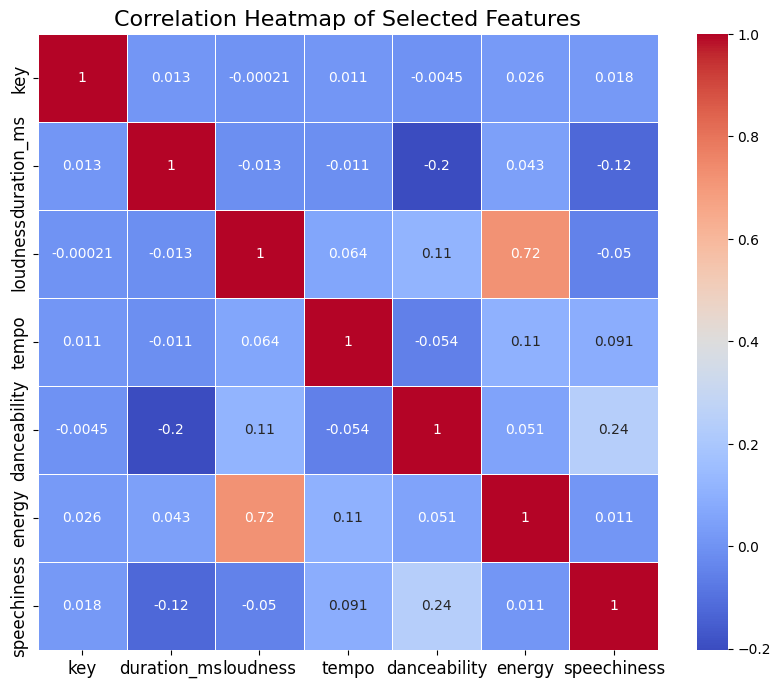

In [5]:
# Create a correlation heatmap of selected columns
cols = ["key", "duration_ms", "loudness", "tempo", "danceability", "energy", "speechiness"]
plt.figure(figsize = (10, 8))
sns.heatmap(X_train[cols].corr(), annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Selected Features", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**Create a Random Forest model** 🎲

In [6]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics (MSE, RMSE, R-squared)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the selected features
print("Selected Features:", selected_columns)
print()

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Selected Features: ['popularity', 'key', 'duration_ms', 'loudness', 'tempo', 'danceability', 'energy', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'n_words', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive']

Mean Squared Error (MSE): 1003514.547562692
Root Mean Squared Error (RMSE): 1001.7557324830699
R-squared (R2): 0.9880585562118025


**Create a customized box plot of the target variable** 📦

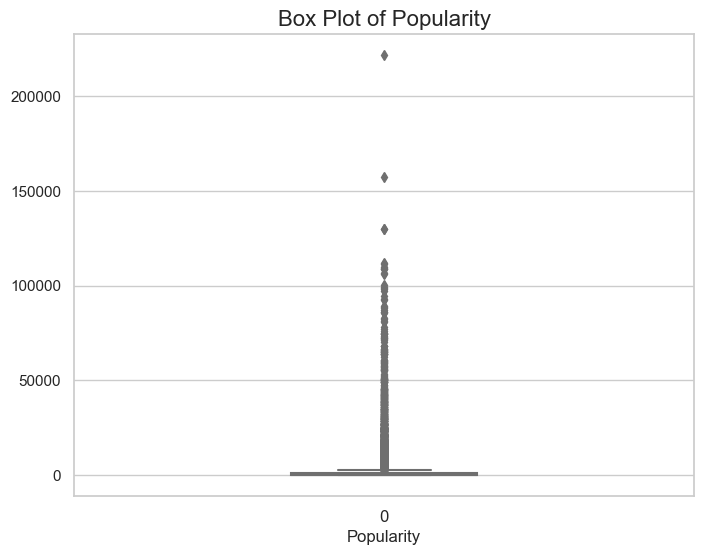

In [7]:
plt.figure(figsize = (8, 6))
sns.set(style = "whitegrid")
sns.boxplot(data = y, color = "skyblue", width = 0.3)
plt.title("Box Plot of Popularity", fontsize = 16)
plt.xlabel("Popularity", fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

**Plot the regression line** 📈

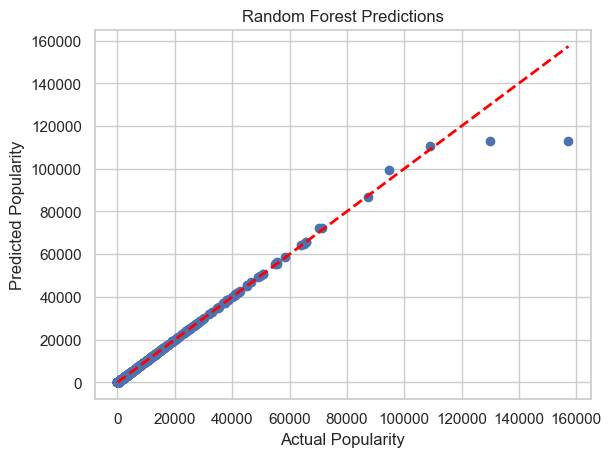

In [8]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", linestyle = "--", linewidth = 2)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Random Forest Predictions")
plt.show()

- **R-squared (R2):** The R-squared value is approximately 0.988, which is very close to 1.0. R-squared measures how well the model explains the variance in the target variable. An R-squared value of 1.0 indicates a perfect fit, so a value of 0.988 is extremely high. This suggests that the model is explaining a significant portion of the variance in the "popularity" target variable.

- **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** The MSE is relatively low (around 1003514.55), and the RMSE is approximately 1001.76. Lower values for MSE and RMSE indicate that the model's predictions are close to the actual values in the target variable.

*These metrics suggest that the Random Forest model is doing an excellent job of predicting the "popularity" of songs based on the selected features.*